# **Facial Emotion Recognisation**

##### **Project Type**    - Computer Vision
##### **Contribution**    -


# **Problem Statement and Objective**


## Project Overview

**DeepFER** is a project focused on developing a robust and efficient system for recognizing human emotions from facial expressions using deep learning techniques. The system leverages Convolutional Neural Networks (CNNs) and Transfer Learning to accurately classify images of faces into one of seven distinct emotion categories: **angry, disgust, fear, happy, neutral, sad, and surprise**. The project integrates both real-time emotion recognition using a webcam and static image analysis, making it versatile and applicable in various domains such as human-computer interaction, mental health monitoring, and customer service enhancement. The dataset is carefully processed and augmented to improve the model's generalization capabilities, and the model's architecture is fine-tuned for optimal performance.

## Project Objective

**Primary Goal:** To develop a state-of-the-art facial emotion recognition system that can classify emotions with high accuracy in real-time and from static images.

**Data Integrity:** Ensure the dataset is clean, well-structured, and free of duplicates or irrelevant data, to maximize model performance.

**Model Development:** Design and implement a deep learning model using pre-trained architectures (e.g., ResNet, VGG16) combined with custom layers to effectively learn and recognize emotional patterns from facial images.

**Real-Time Application:** Integrate the model into a user-friendly application that allows for real-time emotion detection via webcam, as well as the analysis of uploaded images.

# ***Let's Begin !***

## Loading data and Importing libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from tensorflow.keras.applications import VGG16, InceptionResNetV2
from keras import regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau,EarlyStopping
import glob

In [ ]:
class_names = os.listdir("images/train")
print(class_names)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [ ]:
train_dir = "images/train"
test_dir = "images/validation"

## Data Integrity and Cleaning

In [ ]:
# Function to check each subdirectory and warn if it has no files
def check_data_integrity(data_dir):
    # Walk through each directory and subdirectory
    for subdir, dirs, files in os.walk(data_dir):
        # Check if the current subdirectory has no files
        if not files and dirs == []:
            print(f"Warning: No files found in {subdir}")

# Check the integrity of the 'train' and 'validation' directories
check_data_integrity("images/train/")
check_data_integrity("images/validation/")


## Data Preprocessing, Data Agumentation & Data Normalization

In [ ]:
# specifing new image shape for resnet
img_shape = 224
batch_size = 64

In [ ]:
# Preprocessing and Normalizing
train_preprocessor = ImageDataGenerator(
        rescale = 1 / 255.,
        rotation_range=10,
        zoom_range=0.2,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest',
    )
test_preprocessor = ImageDataGenerator(
    rescale = 1 / 255.,
)

In [ ]:
# Setting target_size and other parameters
train_data = train_preprocessor.flow_from_directory(
    train_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode='rgb',
    shuffle=True,
    batch_size=batch_size,
    subset='training',
)

test_data = test_preprocessor.flow_from_directory(
    test_dir,
    class_mode="categorical",
    target_size=(img_shape,img_shape),
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size,
)

Found 28741 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


## Model Development and Architecture

In [ ]:
# Using ResNet50V2 as the base model in transfer learning

base_model = tf.keras.applications.ResNet50V2(input_shape=(224, 224, 3),include_top= False,weights='imagenet')
base_model.summary()



Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 230, 230, 3)          0         ['input_1[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 112, 112, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 pool1_pad (ZeroPadding2D)   (None, 114, 114, 64)         0         ['conv1_conv[0][0]']          
                                                                                       

 conv2_block2_out (Add)      (None, 56, 56, 256)          0         ['conv2_block1_out[0][0]',    
                                                                     'conv2_block2_3_conv[0][0]'] 
                                                                                                  
 conv2_block3_preact_bn (Ba  (None, 56, 56, 256)          1024      ['conv2_block2_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv2_block3_preact_relu (  (None, 56, 56, 256)          0         ['conv2_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv2_block3_1_conv (Conv2  (None, 56, 56, 64)           16384     ['conv2_block3_preact_relu[0][
 D)       

                                                                                                  
 conv3_block2_1_bn (BatchNo  (None, 28, 28, 128)          512       ['conv3_block2_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv3_block2_1_relu (Activ  (None, 28, 28, 128)          0         ['conv3_block2_1_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv3_block2_2_pad (ZeroPa  (None, 30, 30, 128)          0         ['conv3_block2_1_relu[0][0]'] 
 dding2D)                                                                                         
                                                                                                  
 conv3_blo

 ation)                                                                                           
                                                                                                  
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 512)          0         ['conv3_block3_out[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv3_block4_3_conv (Conv2  (None, 14, 14, 512)          66048     ['conv3_block4_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv3_block4_out (Add)      (None, 14, 14, 512)          0         ['max_pooling2d_1[0][0]',     
                                                                     'conv3_block4_3_conv[0][0]'] 
          

 conv4_block3_preact_relu (  (None, 14, 14, 1024)         0         ['conv4_block3_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv4_block3_1_conv (Conv2  (None, 14, 14, 256)          262144    ['conv4_block3_preact_relu[0][
 D)                                                                 0]']                          
                                                                                                  
 conv4_block3_1_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block3_1_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block3_1_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block3_1_bn[0][0]']   
 ation)   

                                                                                                  
 conv4_block5_2_bn (BatchNo  (None, 14, 14, 256)          1024      ['conv4_block5_2_conv[0][0]'] 
 rmalization)                                                                                     
                                                                                                  
 conv4_block5_2_relu (Activ  (None, 14, 14, 256)          0         ['conv4_block5_2_bn[0][0]']   
 ation)                                                                                           
                                                                                                  
 conv4_block5_3_conv (Conv2  (None, 14, 14, 1024)         263168    ['conv4_block5_2_relu[0][0]'] 
 D)                                                                                               
                                                                                                  
 conv4_blo

                                                                     'conv5_block1_3_conv[0][0]'] 
                                                                                                  
 conv5_block2_preact_bn (Ba  (None, 7, 7, 2048)           8192      ['conv5_block1_out[0][0]']    
 tchNormalization)                                                                                
                                                                                                  
 conv5_block2_preact_relu (  (None, 7, 7, 2048)           0         ['conv5_block2_preact_bn[0][0]
 Activation)                                                        ']                            
                                                                                                  
 conv5_block2_1_conv (Conv2  (None, 7, 7, 512)            1048576   ['conv5_block2_preact_relu[0][
 D)                                                                 0]']                          
          

In [ ]:
# Freeze the layers expect for last 5. Allowing last 5 layers to retrain in the ResNet model architecture
base_model.trainable = True

for layer in base_model.layers[:-5]:
    layer.trainable = False

In [ ]:
# Adding top layers - introducing custom layers and adding the output layer with 7 neurons for 7 output.
model = Sequential([base_model,Dropout(.25),BatchNormalization(),Flatten(),Dense(64, activation='relu'),
                    BatchNormalization(),Dropout(.5),Dense(7,activation='softmax')])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50v2 (Functional)     (None, 7, 7, 2048)        23564800  
                                                                 
 dropout (Dropout)           (None, 7, 7, 2048)        0         
                                                                 
 batch_normalization (Batch  (None, 7, 7, 2048)        8192      
 Normalization)                                                  
                                                                 
 flatten (Flatten)           (None, 100352)            0         
                                                                 
 dense (Dense)               (None, 64)                6422592   
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                       

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Defining Callbacks
checkpoint_path = "model_checkpoint.h5"

Checkpoint = ModelCheckpoint(checkpoint_path, monitor="val_accuracy", save_best_only=True,mode='max',verbose=1)

# Create Early Stopping Callback to monitor the accuracy
Early_Stopping = EarlyStopping(monitor = 'val_accuracy', patience = 7, restore_best_weights = True, verbose=1)

# Create ReduceLROnPlateau Callback to reduce overfitting by decreasing learning
Reducing_LR = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.2,patience=2,verbose=1)

callbacks = [Early_Stopping, Reducing_LR]

steps_per_epoch = train_data.n // train_data.batch_size
validation_steps = test_data.n // test_data.batch_size

In [ ]:
# Fit the model
history = model.fit(train_data,
                               validation_data = test_data ,
                               epochs=15,
                               batch_size=batch_size,
                                callbacks = callbacks,
                               steps_per_epoch=steps_per_epoch,
                               validation_steps=validation_steps)

Epoch 1/15


450/450 [==============================] - 1740s 4s/step - loss: 1.7173 - accuracy: 0.4164 - val_loss: 1.2964 - val_accuracy: 0.5206 - lr: 0.0010
Epoch 2/15
450/450 [==============================] - 1383s 3s/step - loss: 1.3896 - accuracy: 0.4887 - val_loss: 1.2301 - val_accuracy: 0.5382 - lr: 0.0010
Epoch 3/15
450/450 [==============================] - 1348s 3s/step - loss: 1.2946 - accuracy: 0.5164 - val_loss: 1.2408 - val_accuracy: 0.5517 - lr: 0.0010
Epoch 4/15
450/450 [==============================] - 1358s 3s/step - loss: 1.2585 - accuracy: 0.5273 - val_loss: 1.1993 - val_accuracy: 0.5597 - lr: 0.0010
Epoch 5/15
450/450 [==============================] - 1456s 3s/step - loss: 1.2202 - accuracy: 0.5436 - val_loss: 1.1553 - val_accuracy: 0.5697 - lr: 0.0010
Epoch 6/15
450/450 [==============================] - 2830s 6s/step - loss: 1.2178 - accuracy: 0.5481 - val_loss: 1.2711 - val_accuracy: 0.5690 - lr: 0.0010
Epoch 7/15
450/450 [==============================] - ET

## Model Evaluation

In [ ]:
# Evaluation on test data
evaluation_score = model.evaluate(test_data)

print("Test Loss: {:.5f}".format(evaluation_score[0]))
print("Test Accuracy: {:.2f}%".format(evaluation_score[1] * 100))

Test Loss: 1.22787
Test Accuracy: 61.11%


In [ ]:
# Save the model
model.save('emotion_recognition_model_v1.h5')

C:\Users\affine\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


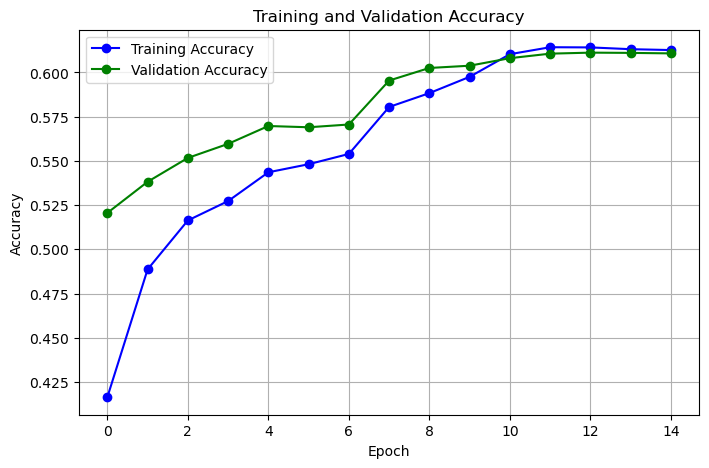

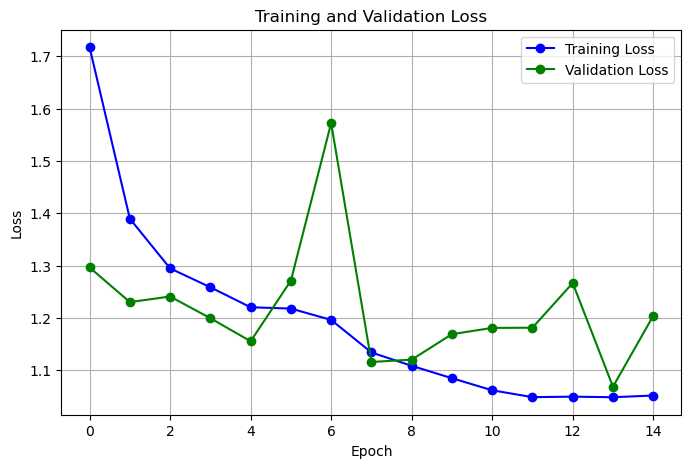

In [ ]:
# Get training and validation accuracy
train_acc_v1 = history.history['accuracy']
val_acc_v1 = history.history['val_accuracy']

# Get training and validation loss
train_loss_v1 = history.history['loss']
val_loss_v1 = history.history['val_loss']

# Plotting accuracy
plt.figure(figsize=(8, 5))
plt.plot(train_acc_v1, label='Training Accuracy', color='blue', marker='o')
plt.plot(val_acc_v1, label='Validation Accuracy', color='green', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plotting loss
plt.figure(figsize=(8, 5))
plt.plot(train_loss_v1, label='Training Loss', color='blue', marker='o')
plt.plot(val_loss_v1, label='Validation Loss', color='green', marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
